In [1]:
# Youth Unemployment EDA – South Africa (Stats SA QLFS)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("ZA110,DF_UNE_SEX_PROV,1.0+all.csv")

# Look at the first few rows
df.head()

,DATAFLOW,FREQ,INDICATOR,REF_AREA,SEX,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MEASURE,UNIT_MULT,FOOTNOTE
0,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q1,257,0.0,NaN,PS,3,Source: QLFS
1,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q2,268,0.0,NaN,PS,3,Source: QLFS
2,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q3,320,0.0,NaN,PS,3,Source: QLFS
3,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q4,315,0.0,NaN,PS,3,Source: QLFS
4,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2009-Q1,330,0.0,NaN,PS,3,Source: QLFS


In [4]:
# Check columns and data types
df.info()

# Quick summary of numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATAFLOW      2070 non-null   object 
 1   FREQ          2070 non-null   object 
 2   INDICATOR     2070 non-null   object 
 3   REF_AREA      2070 non-null   object 
 4   SEX           2070 non-null   object 
 5   TIME_PERIOD   2070 non-null   object 
 6   OBS_VALUE     2070 non-null   int64  
 7   DECIMALS      2010 non-null   float64
 8   OBS_STATUS    0 non-null      float64
 9   UNIT_MEASURE  2070 non-null   object 
 10  UNIT_MULT     2070 non-null   int64  
 11  FOOTNOTE      2070 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 194.2+ KB


,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
count,2070.000000,2010.0,0.0,2070.0
mean,792.616425,0.0,NaN,3.0
std,1251.206504,0.0,NaN,0.0
min,34.000000,0.0,NaN,3.0
25%,200.250000,0.0,NaN,3.0
50%,340.000000,0.0,NaN,3.0
75%,680.750000,0.0,NaN,3.0
max,8384.000000,0.0,NaN,3.0


In [5]:
# Keep only records where SEX = "_T" (total)
df_total = df[df["SEX"] == "_T"].copy()

df_total.head()

,DATAFLOW,FREQ,INDICATOR,REF_AREA,SEX,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MEASURE,UNIT_MULT,FOOTNOTE
0,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q1,257,0.0,NaN,PS,3,Source: QLFS
1,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q2,268,0.0,NaN,PS,3,Source: QLFS
2,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q3,320,0.0,NaN,PS,3,Source: QLFS
3,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2008-Q4,315,0.0,NaN,PS,3,Source: QLFS
4,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2009-Q1,330,0.0,NaN,PS,3,Source: QLFS


In [6]:
# Keep only rows for 2023
df_2023 = df_total[df_total["TIME_PERIOD"].str.contains("2023")].copy()

df_2023.head()

,DATAFLOW,FREQ,INDICATOR,REF_AREA,SEX,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MEASURE,UNIT_MULT,FOOTNOTE
59,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2023-Q1,538,0.0,NaN,PS,3,Source: QLFS
60,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2023-Q2,513,0.0,NaN,PS,3,Source: QLFS
61,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2023-Q3,591,0.0,NaN,PS,3,Source: QLFS
62,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,NW,_T,2023-Q4,582,0.0,NaN,PS,3,Source: QLFS
335,ZA110:DF_UNE_SEX_PROV(1.0),Q,UNE,EC,_T,2023-Q1,946,0.0,NaN,PS,3,Source: QLFS


In [7]:
province_map = {
    "EC": "Eastern Cape",
    "FS": "Free State",
    "GP": "Gauteng",
    "KZN": "KwaZulu-Natal",
    "LP": "Limpopo",
    "MP": "Mpumalanga",
    "NC": "Northern Cape",
    "NW": "North West",
    "WC": "Western Cape"
}

# Create a new column with province names
df_2023["province"] = df_2023["REF_AREA"].map(province_map)

df_2023[["REF_AREA", "province"]].drop_duplicates()

,REF_AREA,province
59,NW,North West
335,EC,Eastern Cape
542,LP,Limpopo
956,MP,Mpumalanga
1232,FS,Free State
1439,NC,Northern Cape
1508,KZN,KwaZulu-Natal
1715,GP,Gauteng
1922,WC,Western Cape
1991,_T,NaN


In [8]:
province_summary = (
    df_2023.groupby("province")["OBS_VALUE"]
    .mean()
    .reset_index()
)

# Sort from highest to lowest
province_summary = province_summary.sort_values("OBS_VALUE", ascending=False)

province_summary

,province,OBS_VALUE
2,Gauteng,2585.75
3,KwaZulu-Natal,1177.50
0,Eastern Cape,948.50
8,Western Cape,710.00
5,Mpumalanga,691.75
4,Limpopo,678.50
6,North West,556.00
1,Free State,432.00
7,Northern Cape,119.50


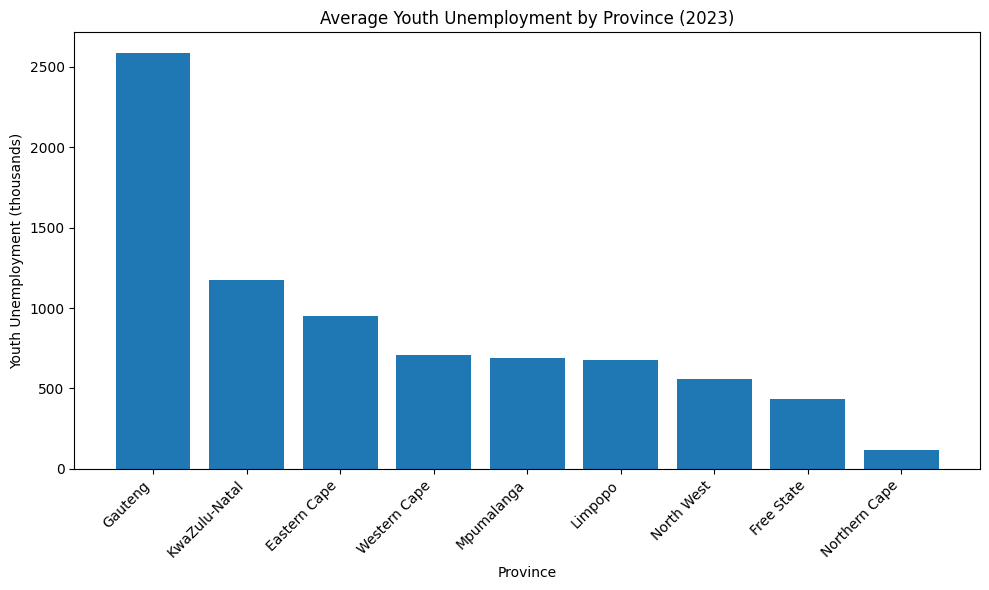

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(province_summary["province"], province_summary["OBS_VALUE"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Province")
plt.ylabel("Youth Unemployment (thousands)")
plt.title("Average Youth Unemployment by Province (2023)")
plt.tight_layout()
plt.show()

### Key Insights

1. Provinces such as **[X]** and **[Y]** have the highest average youth unemployment (in this dataset for 2023).
2. Provinces such as **[A]** and **[B]** show relatively lower levels of youth unemployment.
3. The variation across provinces suggests that local economic structure, education opportunities, and migration patterns may influence youth unemployment outcomes.
4. This basic analysis highlights the need for targeted youth employment policies at a provincial level.